# Midsemester feedback and Decision Trees

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(palett='colorblind')

TypeError: set_theme() got an unexpected keyword argument 'palett'

## Feedback

```{note}
Analysis of the structured questions will be added
```


### Key takeaways
- You're learning and happy with how much you're learning
- You've noticed and appreciate that the assignments build on what we cover in class
- You're reading the notes & like them a lot
- Assignment instructions are sometimes hard to understand


### Reminders based on requests
- all deadlines are on the Brightspace calendar, you can sync that with your own calendar/scheduling tool

### Changes going forward

**Assignments:**
- clarified instructions on assignments 7+ & a note to myself to fix assignments 1-5 for next year
- a reminder when I post assignments to read before class Friday; time on Friday for clarifying questions
- Chamudi & I will meet, re: grading consistency
- [regrade request policy](https://rhodyprog4ds.github.io/BrownFall21/syllabus/policies.html#regrading) posted on website
- more advice on choosing a dataset and some possible good ones
- will add "related notes" section
- Some skill changes are coming, will be posted soon, to make more chances on a few skills

**In class:**
- will continue working on remembering to send all of the code on prismia; feel free to post there to ask for it or raise your hand
- will denote key things that will relate to assignments as much as possible
- to make sure there's space for questions at the end of class, I'll use a google form exit ticket instead of prismia.  I'll still answer all of those questions in the notes, but it makes it easier to ask both pace & follow up. It will always be at: http://drsmb.co/310exit


**Office hours:**
- I can change *when* but not how many hours per week, in particular no one has attended Tuesday afternoon, so I may move that.

:
### Requests I will not fulfill

- regular in person office hours; by appointment only to ensure 1 person at a time
- more total office hours
- link directly where in the notes for assignments, part of the goal is for you to filter out the relevant parts from what we learn in a week in order to apply it. You *can* always ask questions in office hours though.

### Notes
- this was anonymous, comments/updates/questions about grading specifically I cannot reply to; e-mail me if applicable
- use [this form](http://drsmb.co/310fix) to list issues with assignment text/ portfolio requirements to help me improve them in exchange for Ram Tokens


## A6 data review

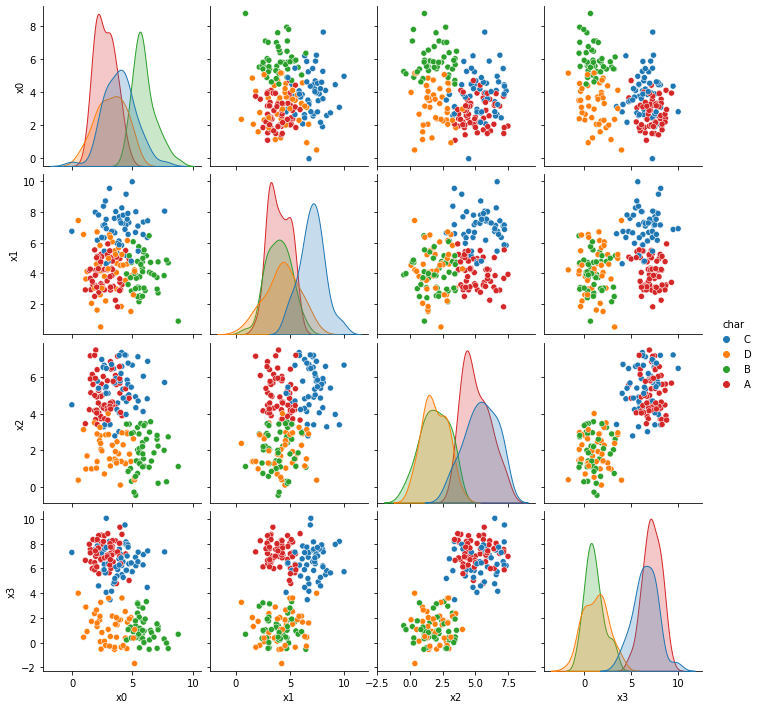

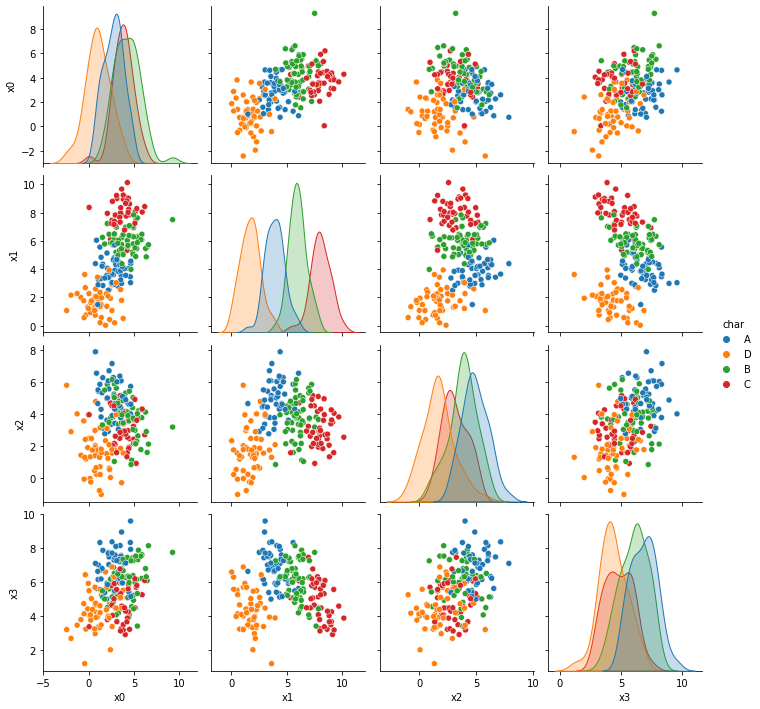

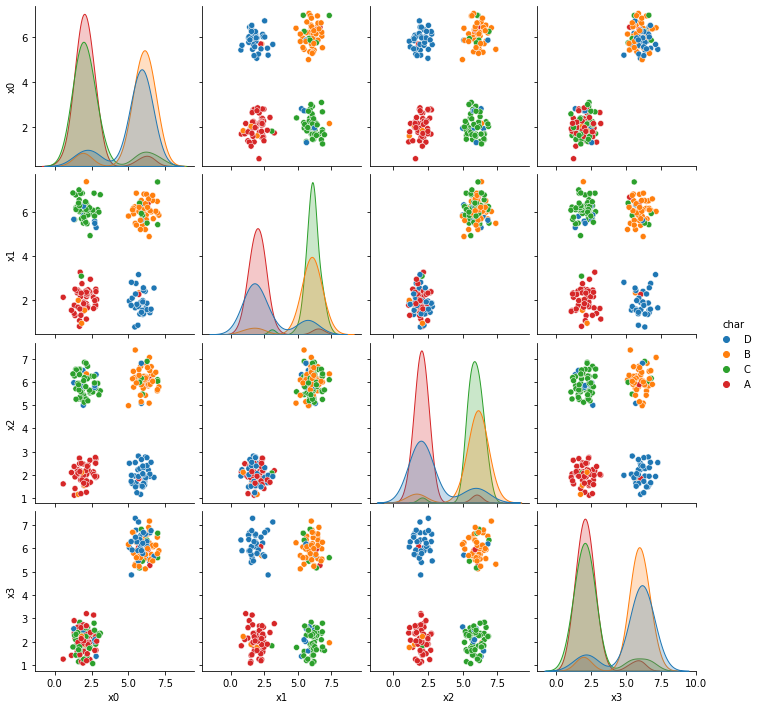

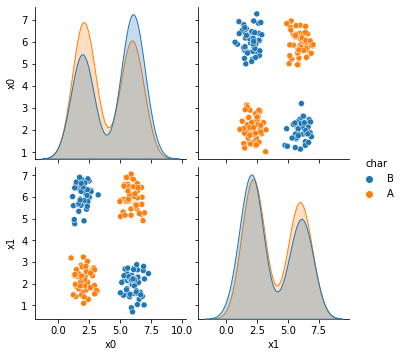

In [2]:
a6_data = 'https://raw.githubusercontent.com/rhodyprog4ds/06-naive-bayes/main/data/dataset'
req_datasets = [1,2,5,6]
data_urls = [a6_data + str(i) +'.csv' for i in req_datasets]
[sns.pairplot(data =pd.read_csv(url,index_col=0), hue='char') for url in data_urls]

Dataset 1 & 2 it should perform reasonably well.  They're both Gaussian data, with some skew, but not too much and some overlap (more in 2).  
````{margin}
```{admonition} Further reading
For more on label bias [a paper I co-authored with an undergrad from Brown](https://dynamicdecisions.github.io/assets/pdfs/29.pdf) after we worked together for 2 years. It also has citations to prior work on label bias in it.
```
```{tip}
You can earn CSC499/491 by doing research with a faculty member.  If fairness is of interest to you, send me an e-mail and we can talk! I am almost always accepting new students and sometimes have funding.  We can also arrange to use workstudy or other funds if you qualify. I will have 1 paid position in the spring semester and 2 in summer + you could apply for the Arts & Sciences Fellow funding.
```
````
Dataset 5, doesn't do so well, but it's performance is clearly because there's some points in each group of points that are labeled differently than the others.  This is to simulate the model for *label bias* which is one way that our traditional performance metrics can fool us.  Our GNB classifier finds the four groups very reliably, but is "incorrect" on the points that are labeled differently.  In real data this can occur in systematic ways, people from disadvantaged groups who otherwise may for example, qualify for a loan, have been denied historically.  So, in training data they would be like the points in each group that are labeled differently.  

Dataset 6, seems separable, but Guassian Naive Bayes gets about 50% accuracy.  

## Let's explore that last one...

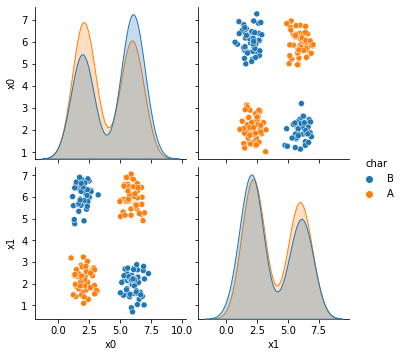

In [3]:
df6= pd.read_csv(data_urls[-1],usecols=[1,2,3])

sns.pairplot(data=df6, hue='char')

This data is *separable* even though the classifier we saw last week doesn't work well for it, because not all of the points for each class are in a single blob. We could imagine a rule that would succeed: if 'x0' and 'x1' are both less than 4 or both more than 4, predict `A` otherwise predict `B`.

````{margin}
```{admonition} Further Reading
I customized this plot to show additional ideas on top of the data
you can read about the [JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html) in the docs.

Using it will require the most up to date version of seaborn.
```
````

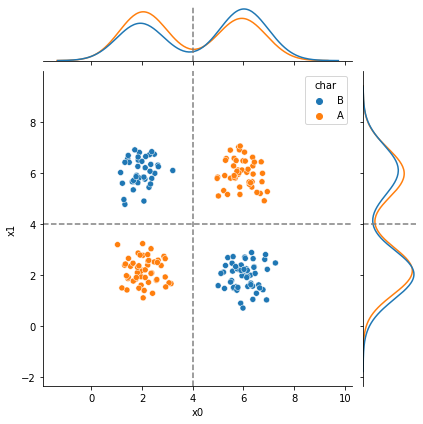

In [4]:
g = sns.JointGrid(data=df6, x='x0', y ='x1', hue='char')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)
g.refline(x=4, y=4)

````{margin}
```{admonition} Ram Token Opportunity
Contribute a diagram for this part of the notes
```
````
The dashed line here shows that those boundaries would separate the classes. I stated that rule in a single if, but we could also imagine it like a tree, a set of binary decisions.

## Learning a Decision Tree
We can *learn* a rule like this one from the data using a
`DecisionTreeClassifier`.
We'll instantiate one from the `tree` module we imported from `sklearn`.

In [5]:
dt = tree.DecisionTreeClassifier()

As usual, we split the data into test and train and features and labels:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                                                    df6['char'],
                                                    random_state = 3094)

````{margin}
```{admonition} Further Reading
- [Decision Tree Docs](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)
- [Decision Tree on Iris](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)
```
````
We fit it just like we fit the Gaussian Naive Bayes, using the `fit` method.

In [7]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Examining a Decision Tree
Since decision trees have common functions whether they're for regression or classification, the `tree` module provides some functions that we can use.

````{margin}
```{admonition} Correction
I was able to make it slightly easier to read, but this was
something that I had to look up on [stackoverflow](https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small)
```
````

[Text(553.0178571428571, 978.48, 'X[0] <= 5.88\nsamples = 100.0%\nvalue = [0.493, 0.507]\nclass = B'),
 Text(388.60714285714283, 761.0400000000001, 'X[1] <= 5.325\nsamples = 70.7%\nvalue = [0.557, 0.443]\nclass = A'),
 Text(239.14285714285714, 543.6, 'X[0] <= 4.07\nsamples = 40.0%\nvalue = [0.733, 0.267]\nclass = A'),
 Text(119.57142857142857, 326.1600000000001, 'X[1] <= 3.98\nsamples = 28.7%\nvalue = [0.953, 0.047]\nclass = A'),
 Text(59.785714285714285, 108.72000000000003, 'samples = 27.3%\nvalue = [1.0, 0.0]\nclass = A'),
 Text(179.35714285714286, 108.72000000000003, 'samples = 1.3%\nvalue = [0.0, 1.0]\nclass = B'),
 Text(358.7142857142857, 326.1600000000001, 'X[1] <= 3.89\nsamples = 11.3%\nvalue = [0.176, 0.824]\nclass = B'),
 Text(298.92857142857144, 108.72000000000003, 'samples = 9.3%\nvalue = [0.0, 1.0]\nclass = B'),
 Text(418.5, 108.72000000000003, 'samples = 2.0%\nvalue = [1.0, 0.0]\nclass = A'),
 Text(538.0714285714286, 543.6, 'X[0] <= 4.085\nsamples = 30.7%\nvalue = [0.326, 

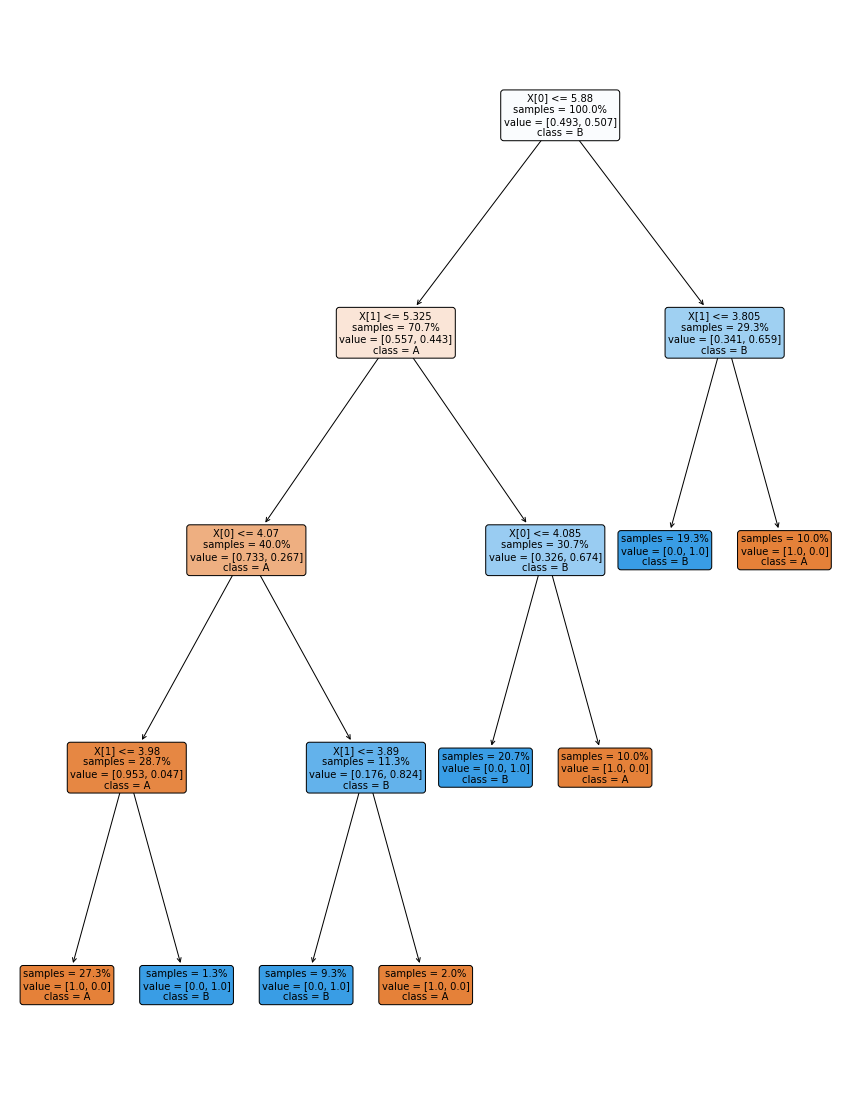

In [8]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt, rounded =True, class_names = ['A','B'],
            proportion=True, filled =True, impurity=False,fontsize=10)

We can also get it out as text; since it returns a plain string, we'll pass it through the print function.

In [9]:
print(tree.export_text(dt))

|--- feature_0 <= 5.88
|   |--- feature_1 <= 5.33
|   |   |--- feature_0 <= 4.07
|   |   |   |--- feature_1 <= 3.98
|   |   |   |   |--- class: A
|   |   |   |--- feature_1 >  3.98
|   |   |   |   |--- class: B
|   |   |--- feature_0 >  4.07
|   |   |   |--- feature_1 <= 3.89
|   |   |   |   |--- class: B
|   |   |   |--- feature_1 >  3.89
|   |   |   |   |--- class: A
|   |--- feature_1 >  5.33
|   |   |--- feature_0 <= 4.09
|   |   |   |--- class: B
|   |   |--- feature_0 >  4.09
|   |   |   |--- class: A
|--- feature_0 >  5.88
|   |--- feature_1 <= 3.80
|   |   |--- class: B
|   |--- feature_1 >  3.80
|   |   |--- class: A



this is the same tree as above.
```{admonition} Try it yourself
Take the time to match this representation to the one above. Read through the parts of the above and see how much it tells you
```

This tree is many more levels (it's deeper) than the one we figured out by looking at the plotted data above. Before we experiment with changing that, let's see how well it works.

In [10]:
dt.score(X_test,y_test)

1.0

It does well, but let's see if we can change the depth and still do well?


## Training parameters

For the Gaussian Naive Bayes classifier, we didn't change how it trained at all. It's a simple classifer, so it's not as impactful.  Since Decision Trees are more complex, the model has hyper parameters and the training algorithm (`fit` method) has parameters.

With `sklearn` these parameters are set when the object is instantiated.  We'll see more on Friday, but for now, we'll set the `max_depth`.

In [11]:
dt2 = tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(X_train,y_train)

dt2.score(X_test,y_test)

0.74

In [12]:
print(tree.export_text(dt2))

|--- feature_0 <= 5.88
|   |--- feature_1 <= 5.33
|   |   |--- class: A
|   |--- feature_1 >  5.33
|   |   |--- class: B
|--- feature_0 >  5.88
|   |--- feature_1 <= 3.80
|   |   |--- class: B
|   |--- feature_1 >  3.80
|   |   |--- class: A



## Questions After Class

### What is it best used on?
```{toggle}
Decision trees are good for lots of tabular data (not images).  
```

### Is there a maximum amount of branches for a tree
```{toggle}
A tree will always have binary splits, so the maximum number of leaf nodes (ends) is the size of the data. That wouldn't be a very good classifer though, we'll see Friday we can make the size needed to split the data (create a new branch) larger as another way to control the tree.
```

### Why do the decision trees work for some data but not others.
```{toggle}
Varialbe performance is due to the data and
```


### What could we really use these trees for?
```{toggle}
Decision trees are a very widely used algorithm for making predictions.  In fact, a flowchart of this form is used in some contexts even when not learned from data.
```

### How is the tree created?
```{toggle}
We'll talk about this a little bit on Friday, but it's mostly out of scope for this course.  It is something you could learn about independently for your portfolio, or it will be covered in depth in CSC461.  

The sklearn docs include a whole [algoithms](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms) section that describes everything including their history and detailed mathematical formulation.
```

### Do I use a gnb when I know the distribution is gaussian?
```{toggle}
Yes, or at least close enough. Fitting the model to the data is a good practice.  We'll learn about overfitting soon and by matching, you're less likely to face this problem.
```